In [1]:
import pandas as pd
import matplotlib.pyplot as pyplot
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import seaborn

# CSVファイルからDataFrameへロード
original_df = pd.read_csv('output_new.csv',encoding='shift-jis')
original_df.head(6)

timestamp          所在地     築年数/階数  floar  price  kyoueki     cost  \
0  2018/8/18 22:25  東京都豊島区池袋3丁目  11年 / 3階建      2  48000     2000  無/無/-/-   
1  2018/8/25 12:47  東京都豊島区池袋3丁目  11年 / 3階建      3  48000     2000  無/無/-/-   
2  2018/8/25 12:47  東京都豊島区池袋3丁目  11年 / 3階建      1  48000     2000  無/無/-/-   
3  2018/8/29 23:27  東京都豊島区池袋3丁目  11年 / 3階建      3  48000     2000  無/無/-/-   
4  2018/8/29 23:27  東京都豊島区池袋3丁目  11年 / 3階建      2  48000     2000  無/無/-/-   
5  2018/8/29 23:27  東京都豊島区池袋3丁目  11年 / 3階建      1  48000     2000  無/無/-/-   

   layout  space                                             datail  \
0       0   5.58  https://www.homes.co.jp/chintai/b-31027030031035/   
1       0   5.58  https://www.homes.co.jp/chintai/b-31027030031047/   
2       0   5.58  https://www.homes.co.jp/chintai/b-31027030028317/   
3       0   5.58   https://www.homes.co.jp/chintai/b-1213670022028/   
4       0   5.58   https://www.homes.co.jp/chintai/b-1213670022029/   
5       0   5.58   https://www.homes.co.jp/chintai/b-1213670022027/   

   constructed_year  constructed_kai  qu  sikikin  reikin                ID  \
0                11                3  豊島      0.0     0.0  b-31027030031035   
1                11                3  豊島      0.0     0.0  b-31027030031047   
2                11                3  豊島      0.0     0.0  b-31027030028317   
3                11                3  豊島      0.0     0.0   b-1213670022028   
4                11                3  豊島      0.0     0.0   b-1213670022029   
5                11                3  豊島      0.0     0.0   b-1213670022027   

  eki_name  eki_distance  
0      池袋駅             9  
1      池袋駅             9  
2      池袋駅             9  
3      池袋駅             9  
4      池袋駅             9  
5      池袋駅             9

In [2]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 18 columns):
timestamp           1525 non-null object
所在地                 1525 non-null object
築年数/階数              1525 non-null object
floar               1525 non-null int64
price               1525 non-null int64
kyoueki             1525 non-null int64
cost                1525 non-null object
layout              1525 non-null int64
space               1525 non-null float64
datail              1525 non-null object
constructed_year    1525 non-null int64
constructed_kai     1525 non-null int64
qu                  1525 non-null object
sikikin             1525 non-null float64
reikin              1525 non-null float64
ID                  1525 non-null object
eki_name            1525 non-null object
eki_distance        1525 non-null int64
dtypes: float64(3), int64(7), object(8)
memory usage: 214.5+ KB


In [3]:
cols = original_df.columns.tolist()
print(cols)

['timestamp', '所在地', '築年数/階数', 'floar', 'price', 'kyoueki', 'cost', 'layout', 'space', 'datail', 'constructed_year', 'constructed_kai', 'qu', 'sikikin', 'reikin', 'ID', 'eki_name', 'eki_distance']


In [4]:
df1=original_df.drop(['timestamp', '所在地', '築年数/階数','cost', 'datail','ID','qu'],axis=1)
df1.info()
df1=df1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 11 columns):
floar               1525 non-null int64
price               1525 non-null int64
kyoueki             1525 non-null int64
layout              1525 non-null int64
space               1525 non-null float64
constructed_year    1525 non-null int64
constructed_kai     1525 non-null int64
sikikin             1525 non-null float64
reikin              1525 non-null float64
eki_name            1525 non-null object
eki_distance        1525 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 131.1+ KB


In [5]:
df1['floar'].value_counts()
print('<<<<<<<<')
df1['eki_distance'].value_counts()

<<<<<<<<


10    230
9     164
7     152
8     152
5     118
11    114
4     105
13     90
6      88
1      59
12     55
3      47
14     41
15     40
2      37
20     13
17      7
19      5
25      4
16      2
24      1
18      1
Name: eki_distance, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D030CC0C18>,
      dtype=object)

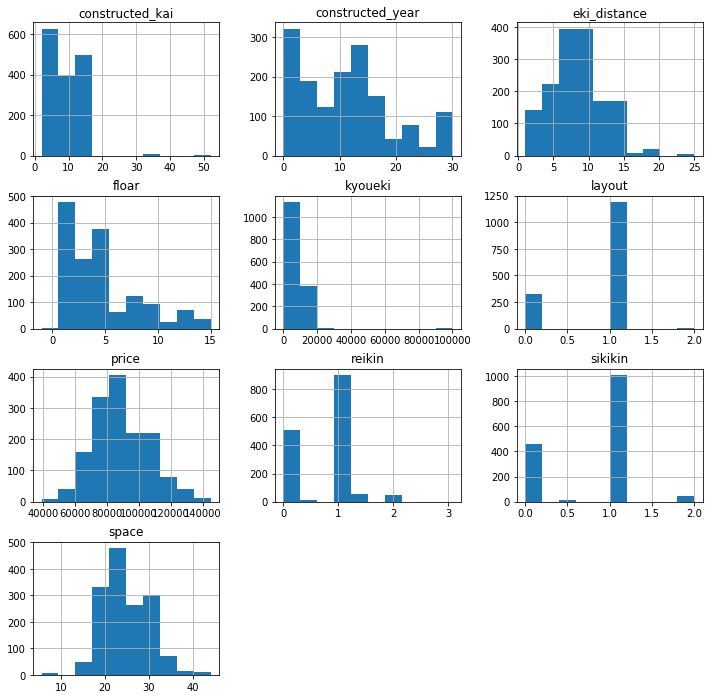

In [6]:
df1.hist(figsize=(12, 12))

In [7]:
features_df = pd.DataFrame()

'''floar               17002 non-null int64
price               17002 non-null float64
kyoueki             17002 non-null float64
layout              17002 non-null int64
space               17002 non-null float64
constructed_year    17002 non-null int64
constructed_kai     17002 non-null int64
sikikin             17002 non-null float64
reikin              17002 non-null float64
eki_name            17002 non-null object
eki_distance        17002 non-null int64'''


# 目的変数の抽出(No-Showなら1)
features_df['price'] = original_df['price']

# 元データを説明変数に追加(typoも同時に修正する)
features_df['floar'] = original_df['floar']
features_df['kyoueki'] = original_df['kyoueki']#.apply(lambda g: 1 if g == 'M' else 0) # 2値変数化
features_df['layout'] = original_df['layout']
features_df['space'] = original_df['space']
features_df['constructed_year'] = original_df['constructed_year']
features_df['constructed_kai'] = original_df['constructed_kai']
features_df['sikikin'] = original_df['sikikin']
features_df['reikin'] = original_df['reikin']
features_df['eki_distance'] = original_df['eki_distance']

#['池袋駅','大塚駅','要町駅','西巣鴨駅','北池袋駅','新大塚駅']
# 予約日の曜日をone-hot-encoding
# d = pd.get_dummies(original_df['eki_name'])
# features_df['AppointmentMonday'] = d['池袋駅']
# features_df['AppointmentTuesday'] = d['大塚駅']
# features_df['AppointmentWednesday'] = d['要町駅']
# features_df['AppointmentThursday'] = d['西巣鴨駅']
# features_df['AppointmentFriday'] = d['北池袋駅']
# features_df['AppointmentSaturday'] = d['新大塚駅']

In [29]:
X = features_df.ix[:, 'floar':]
y = features_df['price']

# 学習データとテストデータの分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


regr = RandomForestRegressor(n_estimators=10,max_depth=9, random_state=0)
regr.fit(X_train, y_train)


#ceshi
y_out=regr.predict(X_test)



# for (k,v) in zip(y_test,y_out):
#     print (k,v)
import math    
from scipy.spatial import distance
dst = distance.euclidean(y_test, y_out)
print('error:',dst/math.sqrt(len(y_test)))

print(regr.predict([[9,#9ceng
                     2,#2 fangzu
                     0,#1K
                     25.4,#mianji
                     0,
                     9,#0nian 9ceng
                     0,0,5]]))

for k in regr.feature_importances_:
    print(int(k*1000))

error: 4488.632093348228
[96063.18930481]
15
26
4
721
103
79
6
5
35


D:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
